Hola **Lucero**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b>

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


data=pd.read_csv('/datasets/gym_churn_us.csv')
data.head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [288]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [289]:
d_cancelacion=data.groupby('Churn')['gender'].mean()
d_cancelacion

Churn
0    0.510037
1    0.510839
Name: gender, dtype: float64

In [290]:
localizacion=data.groupby('Churn')['Near_Location'].mean()
localizacion

Churn
0    0.873086
1    0.768143
Name: Near_Location, dtype: float64

In [291]:
data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [292]:
lista=['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn']

In [293]:
for elemento in lista:
    elemento_m=data.groupby('Churn')[elemento].mean()
    print( elemento, elemento_m)

gender Churn
0    0.510037
1    0.510839
Name: gender, dtype: float64
Near_Location Churn
0    0.873086
1    0.768143
Name: Near_Location, dtype: float64
Partner Churn
0    0.534195
1    0.355325
Name: Partner, dtype: float64
Promo_friends Churn
0    0.353522
1    0.183789
Name: Promo_friends, dtype: float64
Phone Churn
0    0.903709
1    0.902922
Name: Phone, dtype: float64
Contract_period Churn
0    5.747193
1    1.728558
Name: Contract_period, dtype: float64
Group_visits Churn
0    0.464103
1    0.268615
Name: Group_visits, dtype: float64
Age Churn
0    29.976523
1    26.989632
Name: Age, dtype: float64
Avg_additional_charges_total Churn
0    158.445715
1    115.082899
Name: Avg_additional_charges_total, dtype: float64
Month_to_end_contract Churn
0    5.283089
1    1.662582
Name: Month_to_end_contract, dtype: float64
Lifetime Churn
0    4.711807
1    0.990575
Name: Lifetime, dtype: float64
Avg_class_frequency_total Churn
0    2.024876
1    1.474995
Name: Avg_class_frequency_total, d

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, la carga de datos y exploración inicial se realizó correctamente para revisar los datos a trabajar
</div>

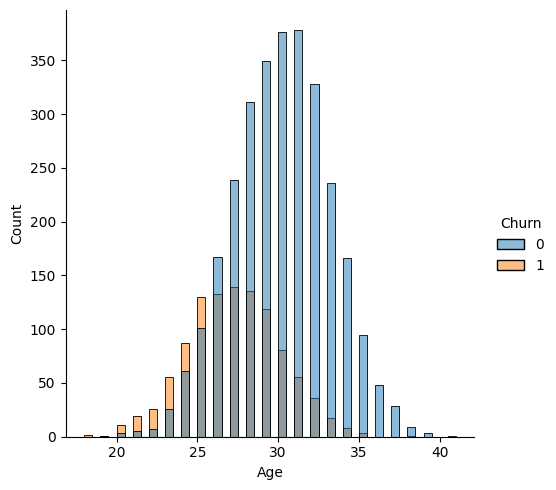

In [294]:
sns.displot(data, x="Age", hue="Churn")

<AxesSubplot:xlabel='gender', ylabel='count'>

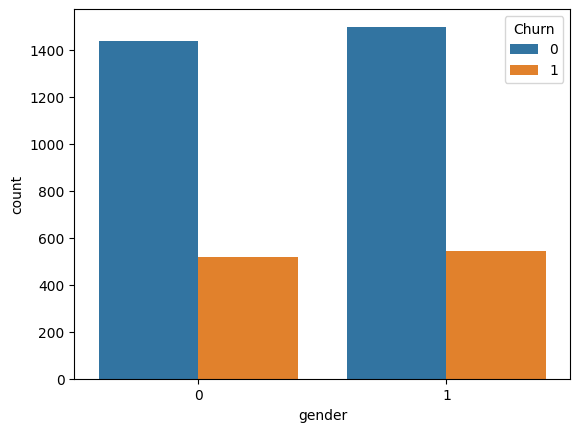

In [295]:
sns.countplot(data=data, x="gender", hue="Churn")

In [296]:
genero_canc=data.loc[data['Churn']==1].groupby('gender').count()['Partner']
genero_canc

gender
0    519
1    542
Name: Partner, dtype: int64

In [297]:
genero_no_canc=data.loc[data['Churn']==0].groupby('gender').count()['Partner']
genero_no_canc

gender
0    1440
1    1499
Name: Partner, dtype: int64

<BarContainer object of 2 artists>

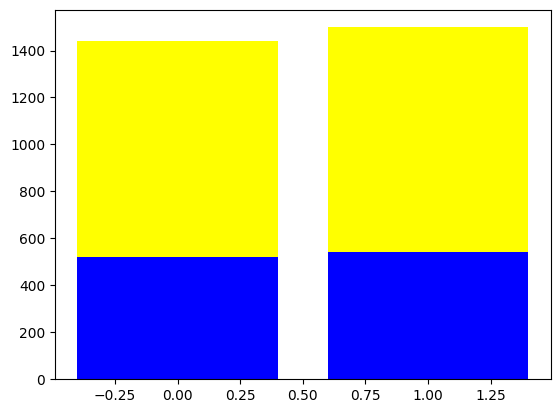

In [298]:
plt.bar(genero_no_canc.index, genero_no_canc.values, color='yellow')
plt.bar(genero_canc.index, genero_canc.values, color='blue')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

In [299]:
 correlacion = data.corr()

<AxesSubplot:>

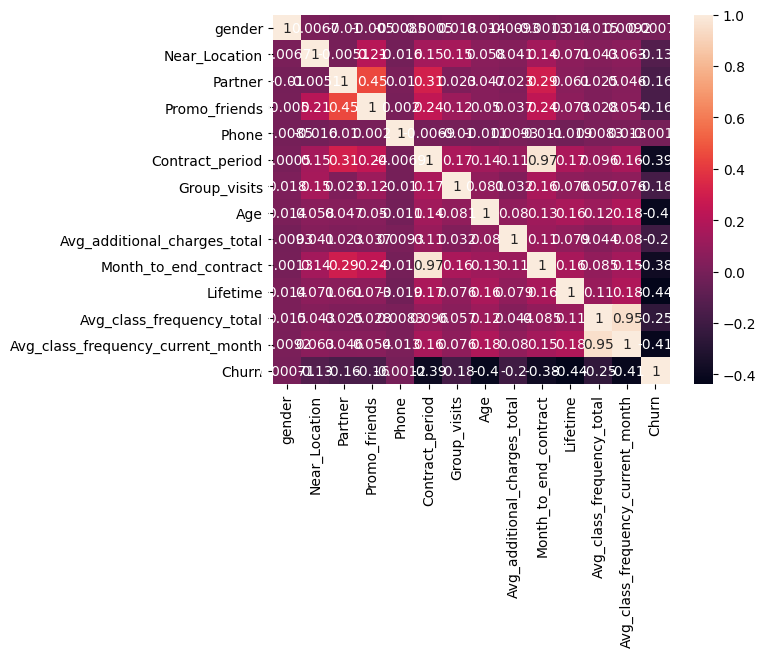

In [300]:
sns.heatmap(correlacion, annot = True)

se observa poca correlacion entre las caracteristicas

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

In [301]:
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [302]:
model = LogisticRegression(max_iter=5000, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=1)

In [303]:
predictions = model.predict(X_test)

In [304]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(precision)
recall

0.8899521531100478


0.8571428571428571

In [305]:
#print(confusion_matrix(y_test, predictions))

In [306]:
exactitud = accuracy_score(y_test, predictions)
exactitud

0.9325

In [307]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)
#X_train.info()

In [308]:
tree_model = RandomForestClassifier(random_state=1)
tree_model.fit(X_train_st, y_train)
# utiliza el modelo entrenado para hacer previsiones
tree_predictions = tree_model.predict(X_test_st)

In [309]:
a_precision = precision_score(y_test, tree_predictions)
a_recall = recall_score(y_test, tree_predictions)
print('precision:', a_precision)
print('recall:', a_recall)

precision: 0.8679245283018868
recall: 0.847926267281106


In [310]:
a_exactitud = accuracy_score(y_test, tree_predictions)
a_exactitud

0.92375

El modelo de regresion logistica fue mejor que el bosque aleatorio

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
    
</div>

In [311]:
X_sc = scaler.fit_transform(X)
linked = linkage(X_sc, method = 'ward')

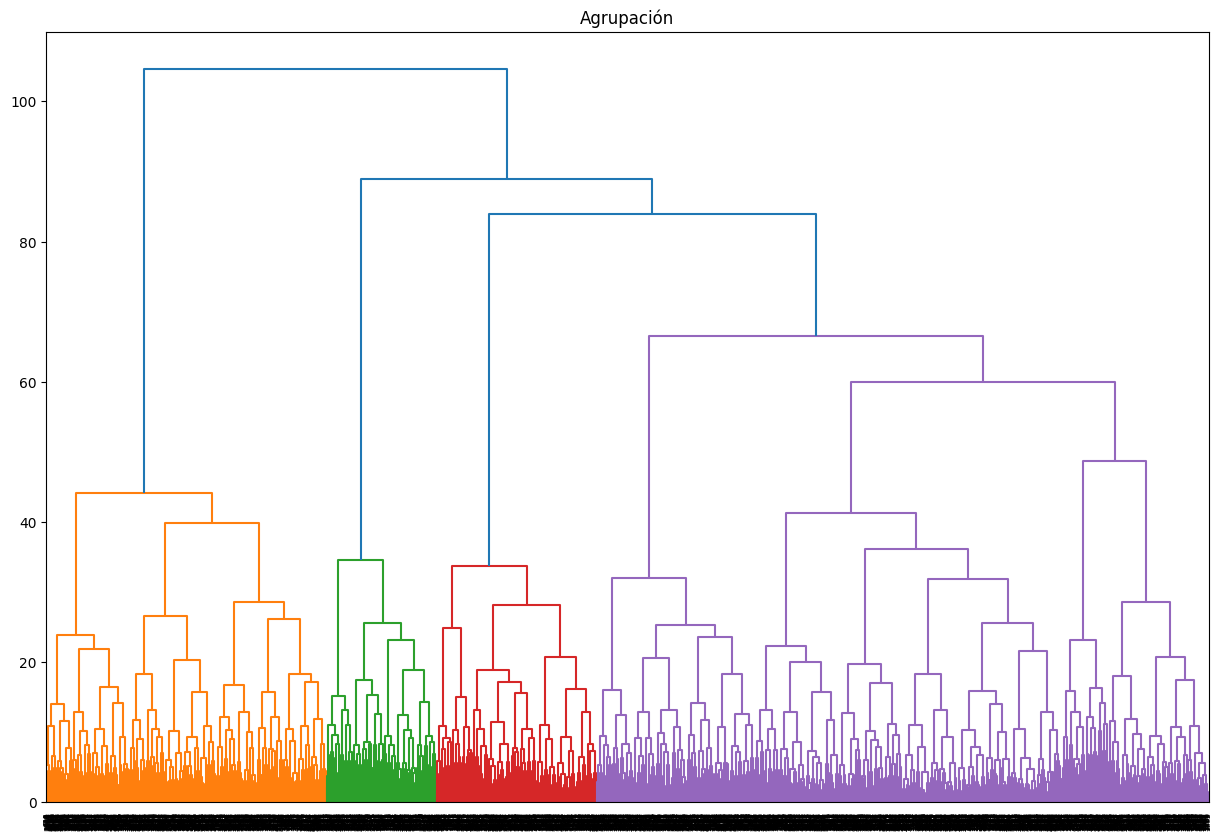

In [312]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación')
plt.show()

In [328]:
km = KMeans(n_clusters = 5, random_state=2) 
labels = km.fit_predict(X_sc)

In [329]:
data['labels']=labels
data.head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,labels
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,1


In [330]:
grupos=data.groupby('labels').mean()
grupos

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
labels,,,,,,,,,,,,,,
0,0.485069,1.000000,0.354318,0.241324,1.0,1.962066,0.341404,28.141243,130.710392,1.871671,2.375303,1.235178,0.997446,0.520581
1,0.499509,0.960746,0.783121,0.576055,1.0,10.863592,0.539745,29.973503,160.800933,9.929342,4.717370,2.001853,1.995321,0.027478
2,0.497041,0.000000,0.461538,0.078895,1.0,2.378698,0.218935,28.479290,135.631940,2.224852,2.812623,1.662253,1.480228,0.441815
3,0.561837,0.977621,0.346290,0.223793,1.0,2.560660,0.471143,30.128386,162.000984,2.358068,4.949352,2.811917,2.807082,0.071849
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
    
</div>

Hay dos grupo que tiene alta cancelacion (label 0 y 2), otro grupo que tiene una cancelacion media (label 5), dos grupos con baja cancelacion (label 1 y 3)

In [331]:
df_0=data.query("labels==0")
df_2=data.query("labels==2")
df_0.head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,labels
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0


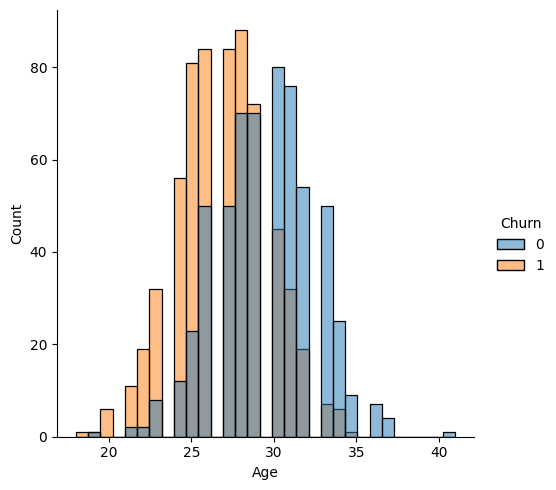

In [332]:
sns.displot(df_0, x="Age", hue="Churn")

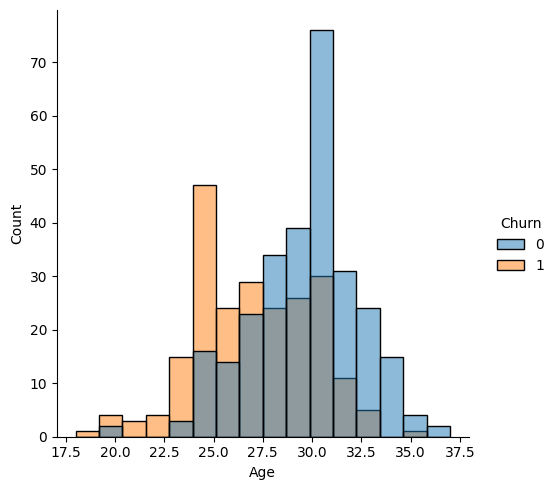

In [333]:
sns.displot(df_2, x="Age", hue="Churn")

Los usuarios que se fueron tienen edad promedio mas joven que los que se quedan

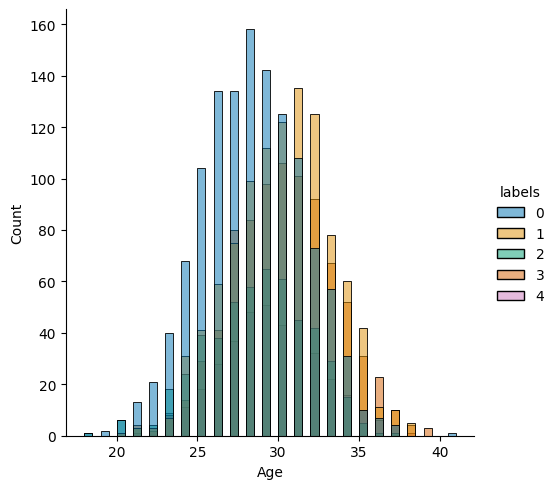

In [334]:
sns.displot(data, x="Age", hue="labels", palette="colorblind")

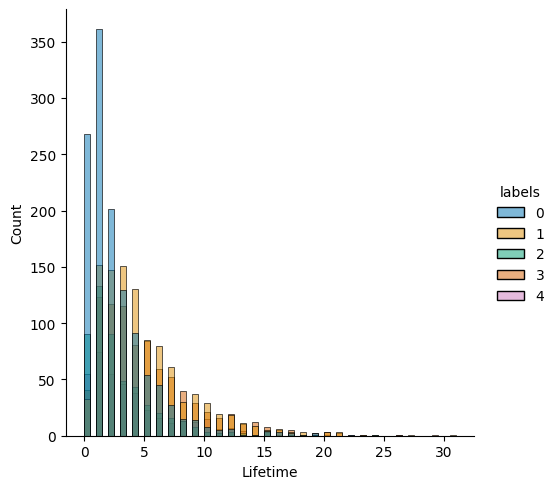

In [335]:
sns.displot(data, x="Lifetime", hue="labels", palette="colorblind")

Los usuarios que cancelaron tenian menos tiempo en el gym que los que se quedan

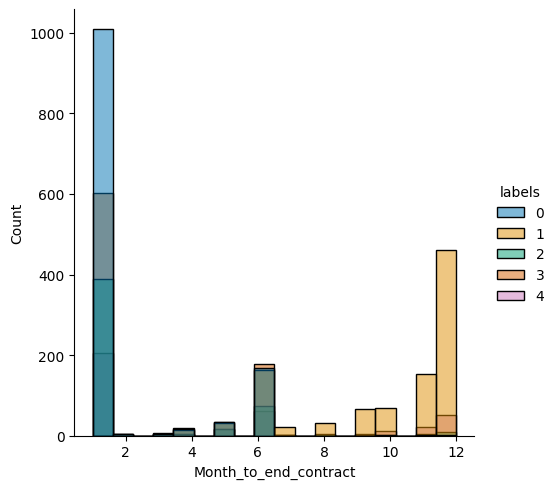

In [336]:
sns.displot(data, x="Month_to_end_contract", hue="labels", palette="colorblind")

Los usuarios que cancelaron tenian pocos meses para finalizar el contrato

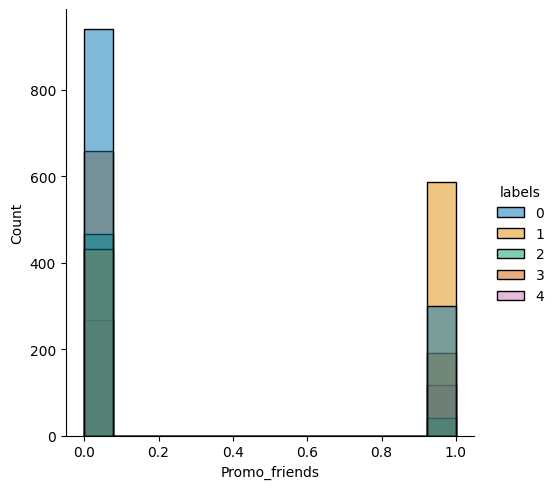

In [337]:
sns.displot(data, x="Promo_friends", hue="labels", palette="colorblind")

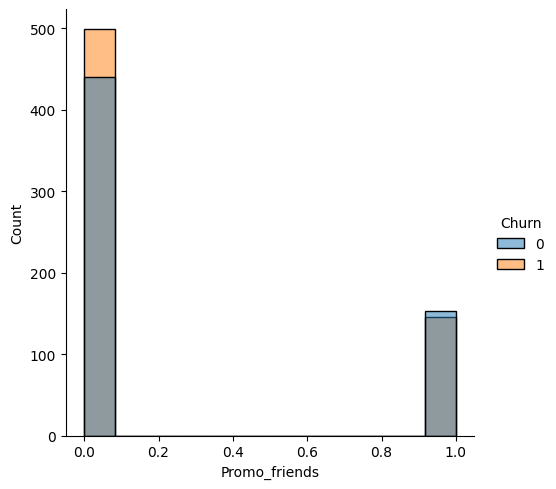

In [338]:
sns.displot(df_0, x="Promo_friends", hue="Churn")

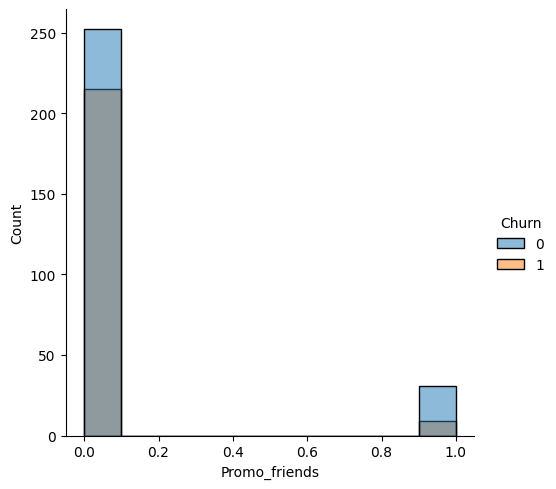

In [339]:
sns.displot(df_2, x="Promo_friends", hue="Churn")

Los usuarios que cancelan tienen pocos amigos en el gym

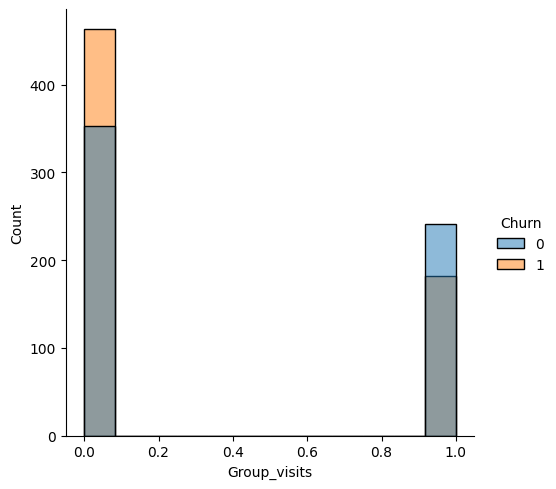

In [340]:
sns.displot(df_0, x="Group_visits", hue="Churn")

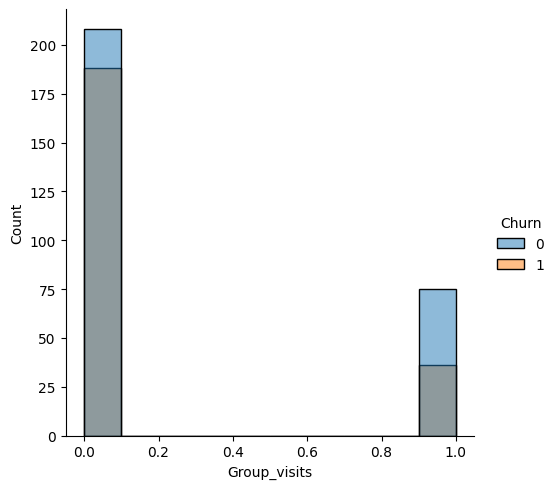

In [341]:
sns.displot(df_2, x="Group_visits", hue="Churn")

CONCLUSIONES:

Los usuarios que cancelan son jovenes, con poco tiempo en el gym, con pocos
meses para terminar el contrato y pocos amigos


RECOMENDACIONES:

Poner descuentos para los jovenes o incentivarlos, promover que
hagan amigos, promover las clases en grupo

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Las conclusiones podrían ser un poco más detalladas considerando el resto de pasos realizados en el notebook, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>